In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

In [39]:
import sys
sys.path.append("D:\\Programacion\\Proyectos\\Tools")

In [7]:
import mlt_class as mlt

# Loading Dataset

In [4]:
df = pd.read_csv(r'D:\Programacion\Datasets\mushroom_cleaned.csv\mushroom_cleaned.csv')

In [4]:
df

,Cap_Diameter,Cap_Shape,Gill_Attachment,Gill_Color,Stem_Height,Stem_Width,Stem_Color,Season,Class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


In [5]:
df.columns = [col.capitalize() if '-' not in col else '_'.join(list(map(lambda x: x.capitalize(),col.split('-')))) for col in df.columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cap_Diameter     54035 non-null  int64  
 1   Cap_Shape        54035 non-null  int64  
 2   Gill_Attachment  54035 non-null  int64  
 3   Gill_Color       54035 non-null  int64  
 4   Stem_Height      54035 non-null  float64
 5   Stem_Width       54035 non-null  int64  
 6   Stem_Color       54035 non-null  int64  
 7   Season           54035 non-null  float64
 8   Class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [30]:
df.describe()

,Cap_Diameter,Cap_Shape,Gill_Attachment,Gill_Color,Stem_Height,Stem_Width,Stem_Color,Season,Class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


# Cleaning Dataset

In [6]:
#duplicated
df.duplicated().sum()

303

In [8]:
#Invalid values
for col in df.columns[:-1]:
    print(f'Col name: {col}\nMin: {df[col].min()}\nMax: {df[col].max()}\n\n')

Col name: Cap_Diameter
Min: 0
Max: 1891


Col name: Cap_Shape
Min: 0
Max: 6


Col name: Gill_Attachment
Min: 0
Max: 6


Col name: Gill_Color
Min: 0
Max: 11


Col name: Stem_Height
Min: 0.0004256969608359
Max: 3.8353196773222433


Col name: Stem_Width
Min: 0
Max: 3569


Col name: Stem_Color
Min: 0
Max: 12


Col name: Season
Min: 0.0273721330556057
Max: 1.804272708628173




In [9]:
#missing
df.isna().sum()

Cap_Diameter       0
Cap_Shape          0
Gill_Attachment    0
Gill_Color         0
Stem_Height        0
Stem_Width         0
Stem_Color         0
Season             0
Class              0
dtype: int64

# Feature Ingineering

In [36]:
df.corr()

,Cap_Diameter,Cap_Shape,Gill_Attachment,Gill_Color,Stem_Height,Stem_Width,Stem_Color,Season,Class
Cap_Diameter,1.000000,0.204011,0.200481,0.186377,0.135652,0.828469,0.121856,0.113334,-0.165676
Cap_Shape,0.204011,1.000000,0.043066,0.131387,-0.010393,0.222494,0.029035,0.055442,-0.133338
Gill_Attachment,0.200481,0.043066,1.000000,0.100276,-0.075284,0.245300,0.020073,-0.040315,-0.052541
Gill_Color,0.186377,0.131387,0.100276,1.000000,0.015057,0.110283,0.186090,0.059965,-0.063947
Stem_Height,0.135652,-0.010393,-0.075284,0.015057,1.000000,0.098095,0.002624,-0.000292,0.183354
Stem_Width,0.828469,0.222494,0.245300,0.110283,0.098095,1.000000,0.157394,0.040679,-0.182856
Stem_Color,0.121856,0.029035,0.020073,0.186090,0.002624,0.157394,1.000000,0.010750,-0.128339
Season,0.113334,0.055442,-0.040315,0.059965,-0.000292,0.040679,0.010750,1.000000,-0.082919
Class,-0.165676,-0.133338,-0.052541,-0.063947,0.183354,-0.182856,-0.128339,-0.082919,1.000000


<Axes: >

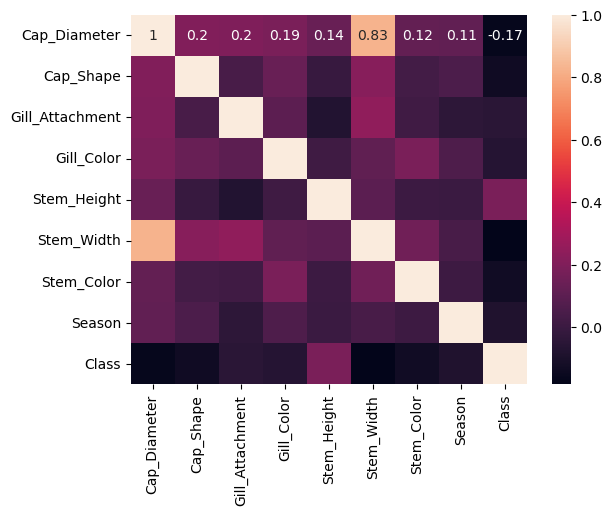

In [35]:
sns.heatmap(data=df.corr(),annot=True)

# ML

In [6]:
X= df.drop('Class',axis=1)
y= df.Class

### XGBs

In [8]:
#classification
xgbs_c = mlt.XGBs(X,y)
xgbs_c.xgbs('c',iter=100)

100%|██████████| 100/100 [00:42<00:00,  2.34trial/s, best loss: -0.9905692152239812]

Accuracy: 0.9883408901637827
Precision: 0.9873991935483871
Recall: 0.9913967611336032
F1: 0.9893939393939395


In [61]:
#regression
xgbs_r = mlt.XGBs(X,y)
xgbs_r.xgbs('r',iter=100)

100%|██████████| 100/100 [01:21<00:00,  1.23trial/s, best loss: 0.027853553941336016]

MSE: 0.011315340204314907
MAE: 0.025775736667963085
R2: 0.9543081328154202


### Svms

In [71]:
#clasification
svms_c = mlt.Svms(X,y)
svms_c.lsvms('c')

100%|██████████| 50/50 [03:05<00:00,  3.70s/trial, best loss: -0.6888120324941687]

Accuracy: 0.6412510409919496
Precision: 0.6580854015723755
Recall: 0.7201417004048583
F1: 0.6877164720096657


### TF

In [1]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [10]:
X_train.shape

(43228, 8)

In [20]:
y_train.shape

(43228,)

In [56]:
tf_model= keras.Sequential(layers=[
    keras.layers.Dense(100,input_shape=(8,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

tf_model.compile(metrics=['accuracy'],
                loss='binary_focal_crossentropy',
                optimizer='adam')

tf_model.fit(X_train,y_train,epochs=20)

Epoch 1/20


C:\Users\Mina\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1351/1351 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5587 - loss: 2.0312
Epoch 2/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5935 - loss: 0.5490
Epoch 3/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6013 - loss: 0.4730
Epoch 4/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6060 - loss: 0.4497
Epoch 5/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6180 - loss: 0.4035
Epoch 6/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6243 - loss: 0.3712
Epoch 7/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6185 - loss: 0.4198
Epoch 8/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6328 - loss: 0.4251
Epoch 9/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6289 - loss: 0.4252
Epoch 10/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6280 - loss: 0.5160
Epoch 11/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6487 - loss: 0.3203
Epoch 12/20
1351/1351 ━━━━━━━━━━━━━━━━━━━